# Statické a dynamické vlastnosti systémů

#Základní pojmy
**Systém** - Soubor vzájemně propojených částí pracujících společně za účelem dosažení jednoho nebo více cílů. Systémy mohou být fyzické (např. stroje, elektronické obvody) nebo abstraktní (např. software, ekonomické systémy).

**Statické vlastnosti** - Vlastnosti systému, které nezávisí na čase. U statického systému výstup přímo závisí na aktuálním vstupu a nezávisí na předchozích vstupech ani na čase. Příkladem může být odpor v elektrickém obvodu, který se nemění v čase.

**Dynamické vlastnosti** - Vlastnosti systému, které závisí na čase a na předchozích stavích systému. Dynamický systém má výstupy, které závisí nejen na současných vstupech, ale také na vstupních hodnotách z minulosti. To je často modelováno pomocí diferenciálních rovnic.

**Diferenciální rovnice** - Rovnice, která popisuje vztah mezi funkcí a jejími derivacemi. V kontextu systémů se diferenciální rovnice často používají k modelování dynamického chování systému, kde se změny v systému odehrávají v závislosti na čase.

#Příklady z reálného světa

##Statický systém: Elektrický odpor
Elektrický obvod s rezistorem. Vztah mezi napětím a proudem v rezistoru lze popsat Ohmovým zákonem *V=IR*, kde V je napětí, I je proud a R je odpor. Odpor R zůstává konstantní bez ohledu na změny napětí nebo proudu, což ukazuje na statickou vlastnost systému.
        
##Dynamický systém: Kyvadlo
Kyvadlo v pohybu je klasickým příkladem dynamického systému. Jeho chování v
čase, včetně kmitů a period, lze popsat pomocí diferenciálních rovnic. Tyto rovnice zohledňují gravitaci, tření a počáteční podmínky, aby přesně předpověděly pohyb kyvadla.



Tato sekce úvodu bude obsahovat textový popis klíčových pojmů doplněný o vizuální schémata a jednoduché interaktivní příklady v Google Colab, které umožní studentům lépe pochopit materiál. Například, můžete vytvořit interaktivní simulaci, kde studenti mohou měnit hodnoty odporu v elektrickém obvodu a vidět, jak se to projeví na výstupním napětí, nebo simulaci, která ukazuje, jak se mění trajektorie kyvadla s různými počátečními podmínkami.


# Diferenciální rovnice jako model systému
##Základní principy diferenciálních rovnic

**Definice**: Diferenciální rovnice je matematická rovnice, která popisuje vztah mezi funkcí a jejími derivacemi. V kontextu systémů nám diferenciální rovnice umožňují modelovat, jak se systém mění v čase.

**Typy diferenciálních rovnic**: Existují obyčejné diferenciální rovnice (ODE), které obsahují jednu nezávisle proměnnou (např. čas) a parciální diferenciální rovnice (PDE), které zahrnují více nezávislých proměnných.

**Použití v systémech**: V dynamických systémech diferenciální rovnice popisují, jak se stav systému mění v čase, reagujíc na vstupy, vnější síly nebo změny v prostředí.

#Příklady diferenciálních rovnic

**Růst populace**: Model růstu populace lze popsat jednoduchou diferenciální rovnicí $$\frac{dP}{dt}=rP$$, kde P je velikost populace v čase t a r je konstanta růstu. Tato rovnice ukazuje, že změna velikosti populace v čase je přímo úměrná současné velikosti populace.

**RC Obvod**: Elektrický obvod s rezistorem (R) a kondenzátorem (C) lze modelovat diferenciální rovnicí, která popisuje, jak se napětí na kondenzátoru mění v čase. Rovnice má tvar

$$
\frac{dV}{dt}=1RC(Vin−V)
$$

, kde Vin​ je vstupní napětí a V je napětí na kondenzátoru.

#Ukázka pro diferenciální rovnici


Diferenciální rovnici pro růst populace, používá numerickou metodu pro nalezení řešení v daném časovém intervalu a nakonec vykresluje řešení. Tento přístup můžete adaptovat pro různé typy diferenciálních rovnic a demonstrovat různé dynamické systémy v praxi. Diferenciální rovnice použitá v kódu reprezentuje model exponenciálního růstu populace. Její forma je:
$$
\frac{dP}{dt} = rP
$$


Kde:

* $\frac{dP}{dt}$je derivace velikosti populace P vzhledem k času t, což vyjadřuje rychlost změny velikosti populace v čase.
* r je konstanta růstu, která určuje, jak rychle nebo pomalu populace roste.
*  P je velikost populace v čase tt.

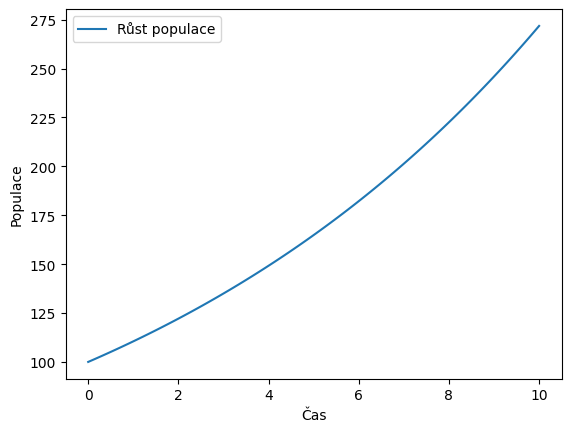

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definice diferenciální rovnice (např., růst populace)
def population_growth(t, P, r):
    return r * P

# Parametry
r = 0.1  # růstová konstanta
P0 = 100  # počáteční populace
t = (0, 10)  # časový interval

# Řešení diferenciální rovnice
sol = solve_ivp(population_growth, t, [P0], args=(r,), dense_output=True)

# Vytvoření časového intervalu pro vykreslení řešení
t_plot = np.linspace(0, 10, 100)
P_plot = sol.sol(t_plot).T

# Vykreslení řešení
plt.plot(t_plot, P_plot, label='Růst populace')
plt.xlabel('Čas')
plt.ylabel('Populace')
plt.legend()
plt.show()


#Přenosová funkce a přechodová charakteristika
## 1. Vysvětlení přenosové funkce a jejího významu pro systémy

Přenosová funkce je matematický model, který popisuje vztah mezi vstupem a výstupem lineárního časově invariantního (LTI) systému ve frekvenční oblasti. Přenosová funkce H(s) je definována jako podíl Laplaceovy transformace výstupního signálu Y(s) k Laplaceově transformaci vstupního signálu X(s), při nulových počátečních podmínkách:
$$H(s)=\frac{Y(s)}{X(s)}$$
​

 *  Význam přenosové funkce: Přenosová funkce poskytuje komplexní pohled na
chování systému ve frekvenční oblasti, umožňuje analýzu stability, frekvenční odezvy a dynamických vlastností systému. Díky tomu je zásadní pro návrh, simulaci a optimalizaci řídicích a signalizačních systémů.

##2. Vysvětlení přechodové charakteristiky a jejího vlivu na chování systémů

Přechodová charakteristika ukazuje, jak systém reaguje na změnu vstupního signálu v čase, nejčastěji na jednotkový skokový vstup. Charakterizuje, jak rychle a jak stabilně systém dosáhne nového ustáleného stavu po změně vstupu.

**Klíčové metriky** zahrnují vzestupný čas (doba potřebná k dosažení určitého procenta konečné hodnoty), překmit (maximální odchylka od konečné hodnoty), a čas ustálení (doba, kdy systém dosáhne a zůstane v blízkosti konečné hodnoty).

**Vliv na chování systémů:** Tyto charakteristiky jsou kritické pro hodnocení výkonnosti a stability systému. Například, v řídicích systémech je žádoucí minimální překmit a rychlý čas ustálení, aby systém rychle dosáhl požadovaného výstupu bez nadměrných kolísání.

##3. Interaktivní simulace ukazující, jak se mění přechodová charakteristika s různými parametry systému

Interaktivní simulace umožní studentům vizualizovat, jak různé parametry systému ovlivňují jeho přechodovou charakteristiku.

##Příklad simulace:

Zaměříme se na systém popsaný přenosovou funkcí, například jednoduchý RC obvod (elektrický filtr), a ukážeme, jak se jeho odezva na skokový vstup mění s různými hodnotami odporu (R) a kapacity (C).

**Definice modelu:** Modelujeme RC obvod s přenosovou funkcí $$H(s)=\frac{1}{RCs+1}$$​, kde:
* R je odpor,
* C je kapacita,
* s je komplexní frekvence.

**Interaktivní prvek:** Umožníme uživatelům měnit hodnoty R a C pomocí posuvníků a sledovat změny v přechodové charakteristice, jako je vzestupný čas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step
from ipywidgets import interact, FloatSlider

# Definice funkce pro výpočet a zobrazení odezvy RC obvodu na skokový vstup
def plot_step_response(R=1.0, C=1.0):
    # Systém definovaný přenosovou funkcí H(s) = 1 / (RCs + 1)
    system = lti([1], [R*C, 1])

    # Výpočet odezvy na skokový vstup
    T, yout = step(system)

    # Vykreslení odezvy
    plt.figure(figsize=(10, 6))
    plt.plot(T, yout)
    plt.title('Odezva RC obvodu na skokový vstup')
    plt.xlabel('Čas [s]')
    plt.ylabel('Výstupní napětí [V]')
    plt.grid(True)
    plt.show()

# Vytvoření interaktivního prvku s posuvníky pro R a C
interact(plot_step_response,
         R=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Odpor R [Ω]:'),
         C=FloatSlider(value=1.0, min=0.01, max=1.0, step=0.01, description='Kapacita [F]:       '))



interactive(children=(FloatSlider(value=1.0, description='Odpor R [Ω]:', max=10.0, min=0.1), FloatSlider(value…

<function __main__.plot_step_response(R=1.0, C=1.0)>

# Praktické příklady a simulace
#1. Statický systém: Elektrický odpor

**Popis**: Ukážeme vztah mezi napětím a proudem v elektrickém obvodu s pevným odporem (Ohmův zákon). Tento příklad ilustruje statické systémy, kde výstup (proud) je přímo úměrný vstupu (napětí) a nezávisí na čase ani na předchozích stavech systému.

**Simulace**: Umožníme studentům měnit hodnotu napětí a sledovat změny v proudu pro různé hodnoty odporu. Tímto způsobem mohou studenti vizualizovat lineární vztah mezi napětím a proudem.

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Ohmův zákon
def ohms_law(V, R):
    return V / R

# Funkce pro vykreslení grafu
def plot_ohms_law(V=5, R=1):
    I = ohms_law(V, R)
    plt.figure(figsize=(10, 6))
    plt.plot(V, I, 'bo')  # Bodový graf
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.title(f'Ohmův zákon: V = {V} V, R = {R} Ω, I = {I:.2f} A')
    plt.xlabel('Napětí (V)')
    plt.ylabel('Proud (A)')
    plt.grid(True)
    plt.show()

# Interaktivní prvek pro změnu hodnoty napětí a odporu
interact(plot_ohms_law,
         V=FloatSlider(value=5, min=0, max=10, step=0.1, description='Napětí V [V]'),
         R=FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Odpor R [Ω]'))



interactive(children=(FloatSlider(value=5.0, description='Napětí V [V]', max=10.0), FloatSlider(value=1.0, des…

<function __main__.plot_ohms_law(V=5, R=1)>

# 2. Simulace mechanického systému: Tlumené kyvadlo

**Popis**: Kyvadlo s tlumením je klasický příklad dynamického systému, kde diferenciální rovnice modeluje jeho pohyb. Tento systém ukazuje, jak gravitace a tlumení ovlivňují oscilace kyvadla.

**Simulace**: Vytvoříme model, který umožní studentům měnit hodnoty délky kyvadla, hmotnosti a koeficientu tlumení. Studenti mohou pozorovat, jak tyto parametry ovlivňují frekvenci oscilací, amplitudu a rychlost, s jakou se kyvadlo zastaví.

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

# Definice diferenciálních rovnic pro tlumené kyvadlo
def damped_pendulum(t, y, L, m, b):
    g = 9.81  # gravitační zrychlení
    theta, omega = y  # úhel a úhlová rychlost
    dydt = [omega, -(b/m)*omega - (g/L)*np.sin(theta)]
    return dydt

# Vykreslení výsledků
def plot_pendulum_motion(L=1.0, m=1.0, b=0.1, theta0=np.pi/4):
    t_span = [0, 10]  # časový interval
    y0 = [theta0, 0]  # počáteční podmínky: úhel a úhlová rychlost
    t_eval = np.linspace(*t_span, 300)

    # Řešení diferenciálních rovnic
    sol = solve_ivp(damped_pendulum, t_span, y0, args=(L, m, b), t_eval=t_eval, method='RK45')

    # Vykreslení
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, sol.y[0])
    plt.title('Pohyb tlumeného kyvadla')
    plt.xlabel('Čas (s)')
    plt.ylabel('Úhel (rad)')
    plt.grid(True)
    plt.show()

# Interaktivní prvek pro změnu parametrů kyvadla
interact(plot_pendulum_motion,
         L=FloatSlider(value=1.0, min=0.5, max=3.0, step=0.1, description='Délka L [m]      '),
         m=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Hmotnost [kg]      '),
         b=FloatSlider(value=0.1, min=0, max=1.0, step=0.05, description='Tlumení b     '),
         theta0=FloatSlider(value=np.pi/4, min=0, max=np.pi, step=np.pi/16, description='Počáteční úhel     '))



interactive(children=(FloatSlider(value=1.0, description='Délka L [m]      ', max=3.0, min=0.5), FloatSlider(v…

<function __main__.plot_pendulum_motion(L=1.0, m=1.0, b=0.1, theta0=0.7853981633974483)>

# Závěrečný kvíz

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Otázky a odpovědi
questions = [
    ("Co je to systém?", ["A) Soubor nezávislých částí", "B) Soubor vzájemně propojených částí pracujících společně", "C) Izolovaný objekt bez interakce s okolím"], "B"),
    ("Která z následujících tvrzení o statických a dynamických systémech je pravdivá?", ["A) Statické systémy mění svůj stav v čase.", "B) Dynamické systémy mají výstupy, které závisí na současných i minulých vstupech.", "C) Dynamické systémy mají výstupy, které jsou nezávislé na čase."], "B"),
    ("Co popisuje diferenciální rovnice?", ["A) Vztah mezi funkcí a jejími derivacemi", "B) Vztah mezi dvěma nezávislými proměnnými", "C) Sumu dvou funkcí"], "A"),
    ("Jaký je vztah mezi napětím a proudem v obvodu s rezistorem podle Ohmova zákona?", ["A) Napětí je přímo úměrné odporu.", "B) Proud je přímo úměrný napětí.", "C) Odpor je přímo úměrný proudu."], "B"),
    ("K čemu slouží přenosová funkce v analýze systémů?", ["A) K určení statických vlastností systému", "B) K popisu vztahu mezi vstupem a výstupem systému ve frekvenční oblasti", "C) K měření teploty systému"], "B"),
    ("Co ukazuje přechodová charakteristika systému?", ["A) Maximální teplotu dosaženou systémem", "B) Jak rychle systém reaguje na změny vstupu", "C) Barvu systému"], "B")
]

# Správné odpovědi
correct_answers = [ans for _, _, ans in questions]

# Funkce pro zpracování odpovědí
def check_answers(b):
    num_correct = 0
    for i, (question, options, _) in enumerate(questions, 1):
        selected_option = answers_widgets[i - 1].value.split(")")[0]
        if selected_option == correct_answers[i - 1]:
            num_correct += 1
    result_widget.value = f"Získali jste {num_correct}/{len(questions)} správných odpovědí."

# Vytvoření widgetů pro otázky a odpovědi
questions_widgets = [widgets.HTML(value=f"<b>{question}</b>") for question, _, _ in questions]
answers_widgets = [widgets.RadioButtons(options=options, layout={'width': 'max-content'}) for _, options, _ in questions]
for answer in answers_widgets:
    answer.style.description_width = 'initial'
    answer.index = None

# Tlačítko pro odeslání odpovědí
submit_button = widgets.Button(description="Odeslat odpovědi")
submit_button.on_click(check_answers)

# Vytvoření výstupního widgetu pro výsledky
result_widget = widgets.Label()

# Zobrazení otázek a tlačítka
display(widgets.VBox([widgets.VBox([question, answer]) for question, answer in zip(questions_widgets, answers_widgets)]), submit_button, result_widget)


Button(description='Odeslat odpovědi', style=ButtonStyle())

Label(value='')